In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing all the libraries

from keras.models import Sequential    # Intializing the Neural Net
from keras.layers import Convolution2D    # Used in the convolution step where we will add convolutional layers
from keras.layers import MaxPooling2D    # Used for pooling layers
from keras.layers import Flatten    # Used for flattening in which we will convert all the pooled feature maps into large feature vector, which will then become the input of the fully connected layers
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator    # For image augmentation 
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.normalization import BatchNormalization
import statistics as stat
import cv2
import pandas as pd
from pathlib import Path
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
# Declaring some variables

image_size = tuple((224, 224))
rotation_range = 25
width_shift_range = 0.1
height_shift_range = 0.1
shear_range = 0.2
zoom_range = 0.2
opt = RMSprop(lr=0.00005)
epochs = 25

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#### Converting Images to Array ####

# Test Set
test_dir = Path('/Users/rohan10/Desktop/Datasets /chest_xray/test')

test_normal_dir = test_dir / 'NORMAL'

test_pneumonia_dir = test_dir / 'PNEUMONIA'

# Train Set
train_dir = Path('/Users/rohan10/Desktop/Datasets /chest_xray/train')

train_normal_dir = train_dir / 'NORMAL'

train_pneumonia_dir = train_dir / 'PNEUMONIA'

# Validation Set
valid_dir = Path('/Users/rohan10/Desktop/Datasets /chest_xray/val')

valid_normal_dir = valid_dir / 'NORMAL'

valid_pneumonia_dir = valid_dir / 'PNEUMONIA'

In [5]:
# Fetching all the images

test_cases_normal = test_normal_dir.glob('*.jpeg')
test_cases_pneumonia = test_pneumonia_dir.glob('*.jpeg')

train_cases_normal = train_normal_dir.glob('*.jpeg')
train_cases_pneumonia = train_pneumonia_dir.glob('*.jpeg')

valid_cases_normal = valid_normal_dir.glob('*.jpeg')
valid_cases_pneumonia = valid_pneumonia_dir.glob('*.jpeg')

In [6]:
#### Test Cases ####

test_cases_array = []
test_cases_label = []

# Test Normal Cases: 
for img in test_cases_normal:
    imagee = cv2.imread(str(img))
    imagee = cv2.resize(imagee, image_size)
    if imagee.shape[2] == 1:
        imagee = np.dstack([imagee, imagee, imagee])
    imagee = cv2.cvtColor(imagee, cv2.COLOR_BGR2RGB)
    imagee = imagee.astype(np.float32)/255.             # Normalizing
    lb = to_categorical(0, num_classes = 2)
    test_cases_array.append(imagee)
    test_cases_label.append(lb)

# Test Pneumonia Cases:
for img in test_cases_pneumonia:
    imagee = cv2.imread(str(img))
    imagee = cv2.resize(imagee, image_size)
    if imagee.shape[2] == 1:
        imagee = np.dstack([imagee, imagee, imagee])
    imagee = cv2.cvtColor(imagee, cv2.COLOR_BGR2RGB)
    imagee = imagee.astype(np.float32)/255.             # Normalizing
    lb = to_categorical(1, num_classes = 2)
    test_cases_array.append(imagee)
    test_cases_label.append(lb)

test_cases_array = np.array(test_cases_array)
test_cases_label = np.array(test_cases_label)

In [7]:
#### Train Cases ####

train_cases_array = []
train_cases_label = []

# Train Normal Cases: 
for img in train_cases_normal:
    imagee = cv2.imread(str(img))
    imagee = cv2.resize(imagee, image_size)
    if imagee.shape[2] == 1:
        imagee = np.dstack([imagee, imagee, imagee])
    imagee = cv2.cvtColor(imagee, cv2.COLOR_BGR2RGB)
    imagee = imagee.astype(np.float32)/255.             # Normalizing
    lb = to_categorical(0, num_classes = 2)
    train_cases_array.append(imagee)
    train_cases_label.append(lb)

# Train Pneumonia Cases:
for img in train_cases_pneumonia:
    imagee = cv2.imread(str(img))
    imagee = cv2.resize(imagee, image_size)
    if imagee.shape[2] == 1:
        imagee = np.dstack([imagee, imagee, imagee])
    imagee = cv2.cvtColor(imagee, cv2.COLOR_BGR2RGB)
    imagee = imagee.astype(np.float32)/255.             # Normalizing
    lb = to_categorical(1, num_classes = 2)
    train_cases_array.append(imagee)
    train_cases_label.append(lb)

train_cases_array = np.array(train_cases_array)
train_cases_label = np.array(train_cases_label)

In [8]:
#### Valid Cases ####
 
valid_cases_array = []
valid_cases_label = []

# Valid Normal Cases:
for img in valid_cases_normal:
    imagee = cv2.imread(str(img))
    imagee = cv2.resize(imagee, image_size)
    if imagee.shape[2] == 1:
        imagee = np.dstack([imagee, imagee, imagee])
    imagee = cv2.cvtColor(imagee, cv2.COLOR_BGR2RGB)
    imagee = imagee.astype(np.float32)/255.             # Normalizing
    lb = to_categorical(0, num_classes = 2)
    valid_cases_array.append(imagee)
    valid_cases_label.append(lb)

# Valid Pneumonia Cases:
for img in valid_cases_pneumonia:
    imagee = cv2.imread(str(img))
    imagee = cv2.resize(imagee, image_size)
    if imagee.shape[2] == 1:
        imagee = np.dstack([imagee, imagee, imagee])
    imagee = cv2.cvtColor(imagee, cv2.COLOR_BGR2RGB)
    imagee = imagee.astype(np.float32)/255.             # Normalizing
    lb = to_categorical(1, num_classes = 2)
    valid_cases_array.append(imagee)
    valid_cases_label.append(lb)

valid_cases_array = np.array(valid_cases_array)  
valid_cases_label = np.array(valid_cases_label)

In [9]:
# Image Data Generator
aug = ImageDataGenerator(rotation_range = rotation_range,
                         width_shift_range = width_shift_range,
                         height_shift_range = height_shift_range,
                         shear_range = shear_range,
                         zoom_range = zoom_range,
                         horizontal_flip = True,
                         fill_mode = 'nearest')

In [10]:
## Initializing the Convolutional Neural Network (CNN) ##

classifier = Sequential()

# Step 1: Convolution 
# In this step, we will specify the number of feature detectors to use.
# The number of feature maps we will obtain will be equal to the number of feature detectors we will use. 

#### Adding the 1st convolutional layer ####

classifier.add(Convolution2D(64, 3, 3, 
                             input_shape = (224, 224, 3), 
                             activation = 'relu'))

classifier.add(BatchNormalization(axis=-1))

# Here:
#      1. '64' is the number of feature detectors we will be using at the start. 
#      2. '3' is the number of rows and columns we will use in the feature detector. 
#      3. The 'input_shape' argument is the expected format of the input images. '224' is the number of pixels, and '3' is the input channel ('3' is used for colored images, and '1' is used for B&W images.)
#      4. The 'relu' activation function is used for non-linearity. 

# Step 2: Max Pooling
# The max pooling step is utilized to reduce the size of the feature maps. Reducing the size reduces the complexity and time execution. 

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

#### Adding the 2nd convolutional layer ####

classifier.add(Convolution2D(96, 3, 3, 
                             activation = 'relu'))
classifier.add(BatchNormalization(axis=-1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Convolution2D(128, 3, 3, 
                             activation = 'relu'))
classifier.add(BatchNormalization(axis=-1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Convolution2D(128, 3, 3, 
                             activation = 'relu'))
classifier.add(BatchNormalization(axis=-1))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Step 3: Flattening 

classifier.add(Flatten())

# Intergrating the ANN
# Adding the hidden layer:

classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(output_dim = 1024, 
                     activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(output_dim = 1024, 
                     activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(output_dim = 2, 
                     activation = 'softmax'))

/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(224, 224,..., activation="relu")`
  del sys.path[0]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/rohan10/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_lau

In [11]:
# Getting the summary of the model

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 96)      55392     
_________________________________________________________________
batch_normalization_2 (Batch (None, 109, 109, 96)      384       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 96)        0         
__________

In [12]:
# Compiling the CNN

classifier.compile(loss='binary_crossentropy',
                  optimizer = RMSprop(lr=0.00005),
                  metrics=['accuracy'])

In [13]:
# Training the model

cnn_model_test = classifier.fit_generator(aug.flow(train_cases_array, train_cases_label, batch_size = 32),
                                          validation_data = (test_cases_array, test_cases_label),
                                          steps_per_epoch = (5216/32),
                                          epochs = epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
163/163 [==============================] - 936s 6s/step - loss: 1.1733 - acc: 0.5454 - val_loss: 0.8296 - val_acc: 0.6250
Epoch 2/25
163/163 [==============================] - 920s 6s/step - loss: 0.9946 - acc: 0.6145 - val_loss: 1.2965 - val_acc: 0.6250
Epoch 3/25
163/163 [==============================] - 928s 6s/step - loss: 0.8213 - acc: 0.6741 - val_loss: 1.6348 - val_acc: 0.6250
Epoch 4/25
163/163 [==============================] - 937s 6s/step - loss: 0.6597 - acc: 0.7456 - val_loss: 1.9716 - val_acc: 0.6330
Epoch 5/25
163/163 [==============================] - 933s 6s/step - loss: 0.5961 - acc: 0.7742 - val_loss: 2.0101 - val_acc: 0.6266
Epoch 6/25
163/163 [==============================] - 931s 6s/step - loss: 0.5202 - acc: 0.8067 - val_loss: 1.5957 - val_acc: 0.6250
Epoch 7/25
163/163 [==============================] - 931s 6s/step - loss: 0.4687 - acc: 0.8286 - val_loss: 1.9435 - val_acc: 0.6202
Epoch 8/25
163/163 [=

Text(0.5, 1.0, 'Training and Validation accurarcy')

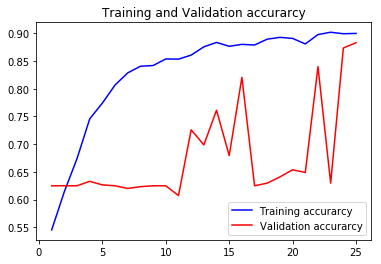

In [14]:
# Visualizing the results of the NN

accuracy = cnn_model_test.history['acc']
value_accuracy = cnn_model_test.history['val_acc']

epochs = range(1, len(accuracy) + 1)

#Train and Validation accuracy

plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, value_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

In [19]:
# Confusion Matrix

preds = classifier.predict(test_cases_array)
preds = np.argmax(preds, axis=-1)
original_values = np.argmax(test_cases_label, axis=-1)

cm  = confusion_matrix(original_values, preds)

In [20]:
cm

array([[192,  42],
       [ 31, 359]])

In the images dataset, there is a problem of class imabalance, i.e. the number of 'Pneumonia' cases is almost 3 times more than the number of 'Normal' cases. Therefore, validation accuracy is not a good enough metric to evaluate the model. Precision and Recall are some other metrics that can be utilized in order to evaulate the model performance. 

In this case, Recall is a much more important metric because we want to minimize the possibility of false negative (fn) cases. It is crucial to minimize the occurrences of false negative cases because diagnosing the patient as normal when they in fact have Pneumonia is a big deal which should be avoided. 

In [21]:
tn, fp, fn, tp = cm.ravel() 

precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [23]:
precision*100
recall*100

# The CNN model has achieved a precision of approximately 90% and recall of 92%

89.52618453865337

92.05128205128204